In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Conv2D, Dense, Flatten, Dropout
from keras.layers import MaxPooling2D
from keras.utils import to_categorical

## Tratamento dos dados

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

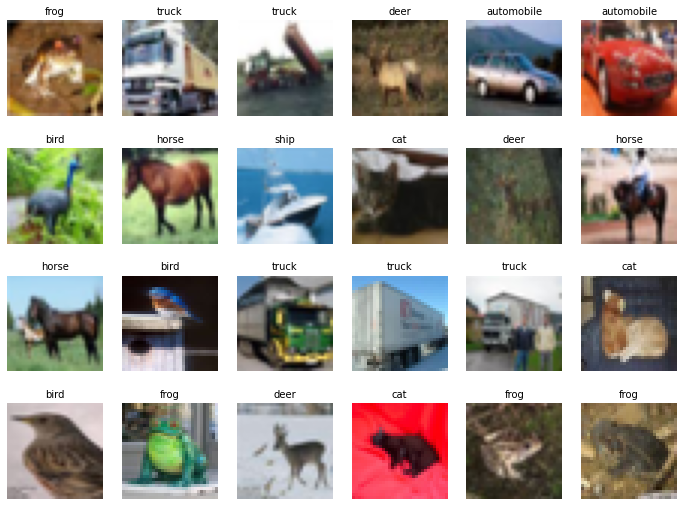

In [20]:
fig, axs = plt.subplots(4, 6, figsize=(12, 9))
k=0
for i in range(4):
    for j in range(6):
        axs[i, j].imshow(x_train[k], cmap='gray')
        axs[i, j].set_title(labels[y_train[k][0]], fontsize=10)
        axs[i, j].axis('off')
        k+=1
    
plt.show()

In [21]:
## Os valores dos componentes de cada pixel RGB variam de 0 a 255
## Vamos normalizar os valores das componentes dos pixels
x_train = x_train/255
x_test = x_test/255

## Transformando os labels em one-hot encoding
y_train_en = to_categorical(y_train, 10)
y_test_en = to_categorical(y_test, 10)

## Fazendo um recorte de dados para treino e validação
x_val = x_train[-10000:]
y_val_en = y_train_en[-10000:]
x_train = x_train[:-10000]
y_train_en = y_train_en[:-10000]

## Modelo

In [23]:
## Instanciando o modelo sequencial
model = Sequential()

## Adicionando camadas ao modelo
## 1) Conv2D: Duas camadas com 64 filtros de 4x4 e função de ativação ReLU
## Gerará 64 mapas de características em cada camada,
## cada um com 28x28 pixels (tamanho da imagem após a aplicação dos filtros)
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))

## 2) MaxPooling2D: reduz as dimensões da saída da camada
## transformando cada 2x2 pixels em 1 pixel
model.add(MaxPooling2D(pool_size=(2,2)))

## 3) Dropout: desativa aleatoriamente 40%
## dos neurônios da camada para evitar overfitting
model.add(Dropout(0.4))


## 4) Conv2D: Duas camadas com 128 filtros de 4x4 e função de ativação ReLU
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))

## 5) MaxPooling2D: reduz novamente as dimensões da saída da camada
model.add(MaxPooling2D(pool_size=(2,2)))

## 6) Dropout: desativa aleatoriamente 40%
## dos neurônios da camada para evitar overfitting
model.add(Dropout(0.4))


## 7) Flatten: transforma a matriz em um vetor 1D
model.add(Flatten())

## 8) Duas camadas de 1024 neurônios com função de ativação ReLU
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))

## 9) 10 neurônios com função de ativação softmax
model.add(Dense(units = 10, activation = 'softmax'))

## Compilando o modelo:
    ## loss: função de erro categorical_crossentropy
    ## optimizer: algoritmo de otimização Adam
    ## metrics: métrica de avaliação accuracy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
## Treinando o modelo
epochs = 30
batch_size = 64

cifar = model.fit(x_train, y_train_en, epochs=epochs, batch_size=batch_size,
          validation_data=(x_val, y_val_en))

Epoch 1/30
625/625 [==============================] - 372s 594ms/step - loss: 1.7627 - accuracy: 0.3348 - val_loss: 1.5276 - val_accuracy: 0.4290
Epoch 2/30
625/625 [==============================] - 323s 517ms/step - loss: 1.4426 - accuracy: 0.4744 - val_loss: 1.2845 - val_accuracy: 0.5287
Epoch 3/30
625/625 [==============================] - 340s 543ms/step - loss: 1.3071 - accuracy: 0.5301 - val_loss: 1.2182 - val_accuracy: 0.5547
Epoch 4/30
625/625 [==============================] - 316s 505ms/step - loss: 1.2086 - accuracy: 0.5685 - val_loss: 1.0957 - val_accuracy: 0.6067
Epoch 5/30
625/625 [==============================] - 300s 479ms/step - loss: 1.1346 - accuracy: 0.6000 - val_loss: 1.0920 - val_accuracy: 0.6121
Epoch 6/30
625/625 [==============================] - 435s 697ms/step - loss: 1.0797 - accuracy: 0.6185 - val_loss: 1.1140 - val_accuracy: 0.5982
Epoch 7/30
625/625 [==============================] - 326s 521ms/step - loss: 1.0259 - accuracy: 0.6348 - val_loss: 0.9717 -

## Métricas

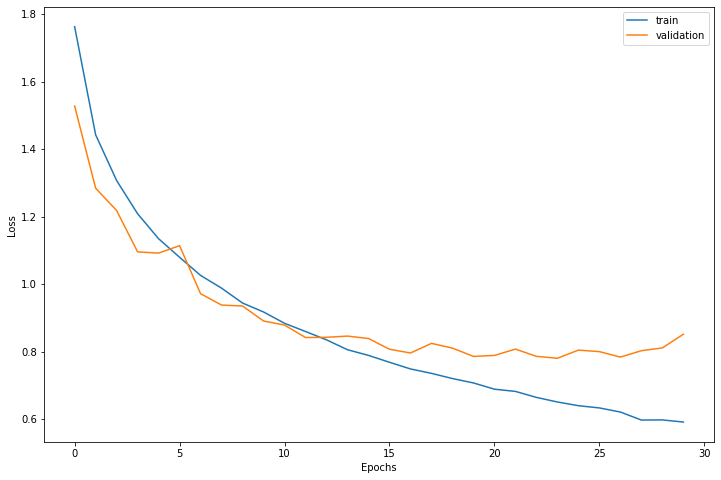

In [38]:
## Curva do erro medio
plt.figure(figsize=(12,8))
plt.plot(cifar.history['loss'], label='train')
plt.plot(cifar.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
## Avaliando o modelo
loss, accuracy = model.evaluate(x_test, y_test_en)
print('loss:', loss)
print('Acurácia:', accuracy)

313/313 [==============================] - 16s 50ms/step - loss: 0.8891 - accuracy: 0.7234
loss: 0.8891134858131409
Acurácia: 0.7233999967575073


313/313 [==============================] - 15s 48ms/step


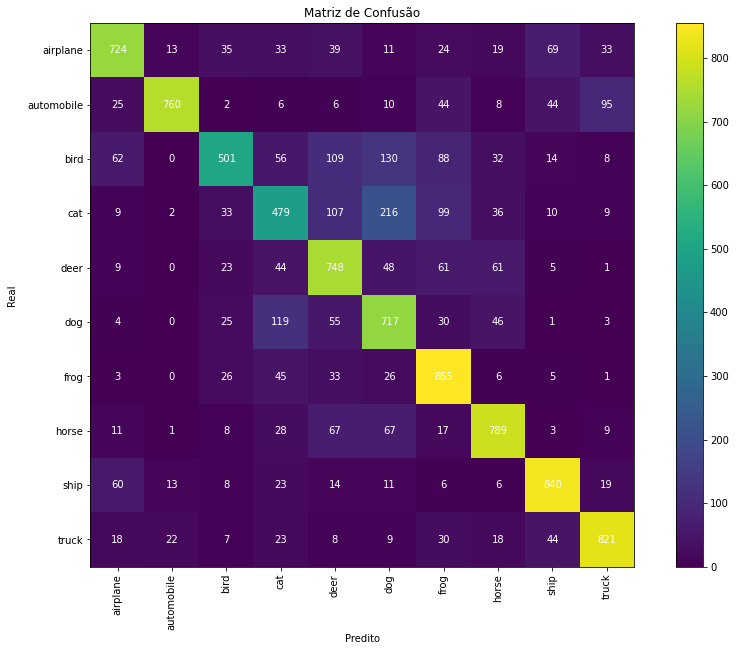

In [47]:
## Construindo a matriz de confusão
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_en, axis=1)

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(15,10))
cax = ax.matshow(cm)

## Adicionando as labels do eixo x na parte de baixo do plot
plt.xticks(range(10), labels, rotation=90)
ax.xaxis.set_ticks_position('bottom')
plt.yticks(range(10), labels)

## Adicionando os números no centro de cada célula
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

fig.colorbar(cax)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real', labelpad=10)
plt.show()

In [77]:
import imageio.v3 as im
import numpy as np

In [129]:
amy = im.imread('bichos/amy.jpeg')
amy_norm = [amy/255]

hannah = im.imread('bichos/hannah.jpeg')
hannah_norm = [hannah/255]

hannah2 = im.imread('bichos/hannah2.jpg')
hannah2_norm = [hannah2/255]

raissa = im.imread('bichos/raissa.jpeg')
raissa_norm = [raissa/255]

mad = im.imread('bichos/madalena.jpeg')
mad_norm = [mad/255]

harold = im.imread('bichos/bruna.jpeg')
harold_norm = [harold/255]

harold2 = im.imread('bichos/harold2.jpeg')
harold2_norm = [harold2/255]

garfield = im.imread('bichos/garfield.jpeg')
garfield_norm = [garfield/255]

batman = im.imread('bichos/batman.jpeg')
batman_norm = [batman/255]

yordan = im.imread('bichos/yordan.jpeg')
yordan_norm = [yordan/255]

x_dogs = np.array([amy_norm, hannah_norm, hannah2_norm, raissa_norm,
                   mad_norm, harold_norm, harold2_norm, garfield_norm,
                   batman_norm, yordan_norm])

y_dogs = np.array([[5], [5], [5], [5], [5], [5], [5], [3], [3], [5]])
y_dogs_en = to_categorical(y_dogs, 10)

print(f'amy = {labels[np.argmax(model.predict(x_dogs[0]))]}\n')
print(f'hannah = {labels[np.argmax(model.predict(x_dogs[1]))]}\n')
print(f'hanna2 = {labels[np.argmax(model.predict(x_dogs[2]))]}\n')
print(f'raissa = {labels[np.argmax(model.predict(x_dogs[3]))]}\n')
print(f'madalena = {labels[np.argmax(model.predict(x_dogs[4]))]}\n')
print(f'harold = {labels[np.argmax(model.predict(x_dogs[5]))]}\n')
print(f'harold2 = {labels[np.argmax(model.predict(x_dogs[6]))]}\n')
print(f'garfield = {labels[np.argmax(model.predict(x_dogs[7]))]}\n')
print(f'batman = {labels[np.argmax(model.predict(x_dogs[8]))]}\n')
print(f'yordan = {labels[np.argmax(model.predict(x_dogs[9]))]}\n')

1/1 [==============================] - 0s 24ms/step


amy = frog

1/1 [==============================] - 0s 102ms/step
hannah = frog

1/1 [==============================] - 0s 31ms/step
hanna2 = dog

1/1 [==============================] - 0s 31ms/step
raissa = dog

1/1 [==============================] - 0s 16ms/step
madalena = dog

1/1 [==============================] - 0s 33ms/step
harold = horse

1/1 [==============================] - 0s 17ms/step
harold2 = cat

1/1 [==============================] - 0s 16ms/step
garfield = cat

1/1 [==============================] - 0s 33ms/step
batman = cat

1/1 [==============================] - 0s 32ms/step
yordan = truck



1/1 [==============================] - 0s 45ms/step


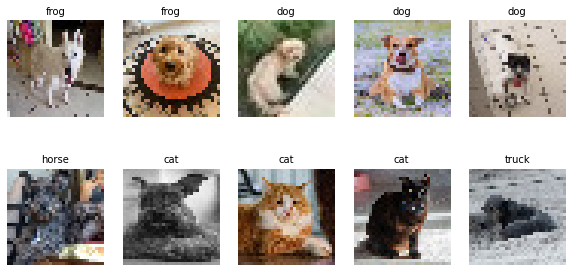

In [130]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
k=0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(x_dogs[k][0], cmap='gray')
        axs[i, j].set_title(labels[np.argmax(model.predict(x_dogs[k]))], fontsize=10)
        axs[i, j].axis('off')
        k+=1

In [135]:
x_dogs.shape
x_dogs = np.array([x_dogs[i].flatten() for i in range(10)])
x_dogs = x_dogs.reshape(10, 32, 32, 3)

model.evaluate(x_dogs, y_dogs_en)